In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from os import listdir
from os.path import isfile, join
from scipy import signal

In [38]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (4,3)  # good default size for column-width figure

In [39]:
filepath = 'data/feb28/16011_water_tau03.csv'
tau = 0.003 # s

df = pd.read_csv(filepath, header=None)
df.columns = ['Header', 'Headerdata', 'n1', 't', 'V']
df = df.drop(columns=['n1'])

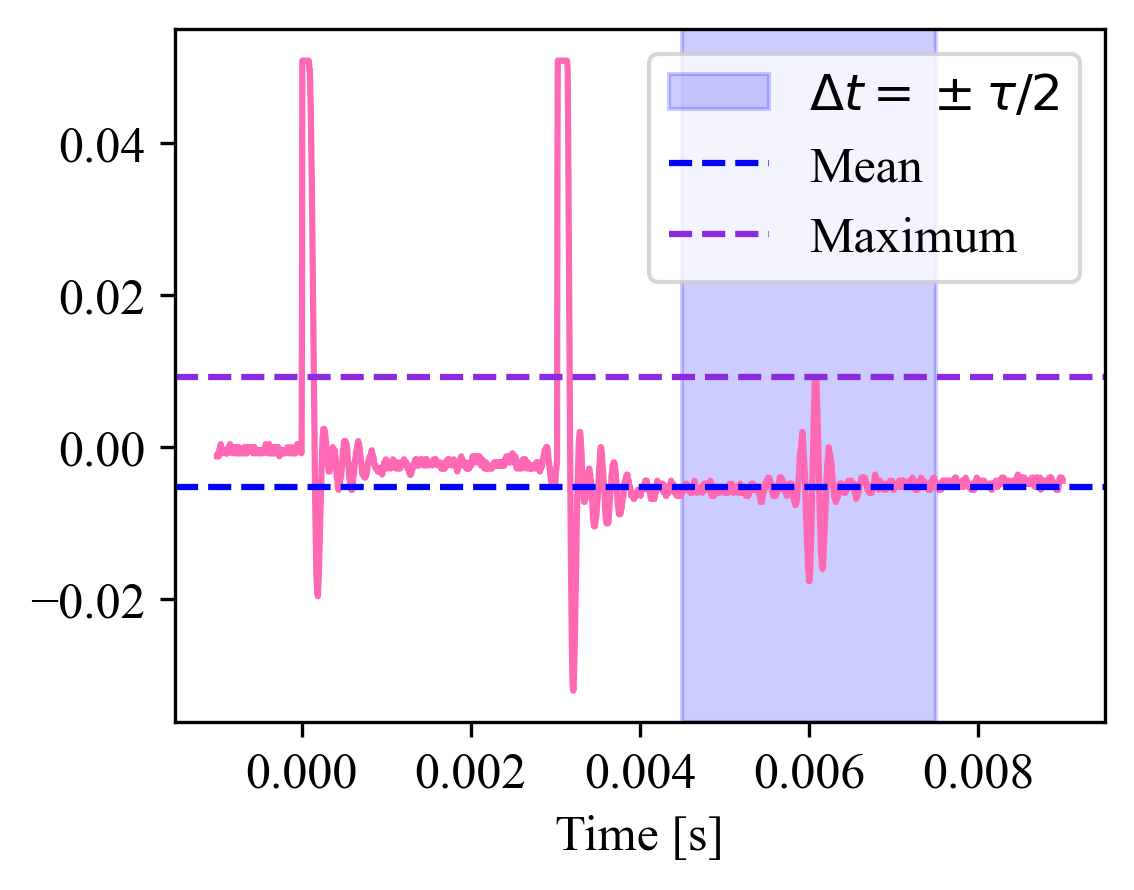

In [54]:
times = df['t'].to_numpy()
volts = df['V'].to_numpy()
    
lower_val = 2 * tau - 0.5 * tau
upper_val = 2 * tau + 0.5 * tau
    
lower_idx = (np.abs(times - lower_val)).argmin()
upper_idx = (np.abs(times - upper_val)).argmin()

y = volts[lower_idx:upper_idx]
amax = np.amax(y)
avg = np.mean(y)
    
plt.plot(times, volts, color="hotpink")
#plt.arrow(0, 0.052, tau, 0, width = 0.0001, head_width=0.001, head_length=0.0001, length_includes_head='true', color='black')
# plt.annotate(text='', xy=(0, 0.052), xytext=(tau,0.052), arrowprops=dict(arrowstyle='<->'))
# plt.text(0.0014, 0.053, r'$\tau$')
plt.axvspan(times[lower_idx], times[upper_idx], color="blue", alpha=0.2, label=r"$\Delta t = \pm \tau /2$")
plt.axhline(avg, ls='--', color="blue", label="Mean")
plt.axhline(amax, ls='--', color="blueviolet", label="Maximum")
plt.xlabel("Time [s]")
# plt.title(f"tau = {tau:.3f} [s]")
plt.legend()
plt.show()

In [ ]:
t = np.linspace(0, 10, 1000)

pulse1 = signal.square(2*)